# WeatherPy


Observations:
1. In the Northern Hemisphere, the higher the latitude shows a negative coorleation to the temperature. This makes sense as the closer you get to the north pole, the colder it gets. Since the southern hemisphere has negative values, there is a positive coorleation between the two, although it is not as strong as it is in the north. 

2. Humidity, cloudiness and wind speed did not display a coorelation to the latitude values. This suggests that these factors are not very location dependent. 

3. The number of values for the Northern Hemisphere from this particular data request was 381 and for the Southern one it was only 177. This makes the southern data more limited for drawing conclutions. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV) - ASK GRETEL THIS 
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build a URL for the OWM API, include a units variable and your API Key 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create the variables needed for the data you are interested in
cities = cities

counter = 0
temp = []
lat = []
lon = []
hum = []
cloud = []
wind = []
city_list = []
date =[]
country = []

# Make a loop for each city you will be looking for, appened your empty list for the info you will gather
# Make sure to include an expection for pulled cities that might not show up from CityPy to OWM

for city in cities:
    response = requests.get(query_url + city).json()  
    counter += 1
    
    try:
        city_list.append(city)
        date.append(response['dt'])
        country.append(response['sys']['country'])
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f"Processing request for: {counter}, {city}")

    except (KeyError):
        city_list.remove(city)
        print("Missing field/result... skipping.")
        pass

Processing request for: 1, kodiak
Processing request for: 2, east london
Processing request for: 3, guthrie
Processing request for: 4, albany
Processing request for: 5, tuktoyaktuk
Processing request for: 6, puerto ayora
Processing request for: 7, cagliliog
Processing request for: 8, ponta do sol
Processing request for: 9, longhua
Processing request for: 10, birnin kebbi
Processing request for: 11, broome
Processing request for: 12, ushuaia
Missing field/result... skipping.
Processing request for: 14, alpena
Processing request for: 15, leningradskiy
Processing request for: 16, georgetown
Processing request for: 17, vaini
Processing request for: 18, mataura
Processing request for: 19, atuona
Processing request for: 20, kapaa
Processing request for: 21, libreville
Processing request for: 22, mahajanga
Processing request for: 23, praya
Missing field/result... skipping.
Processing request for: 25, broken hill
Processing request for: 26, tautira
Processing request for: 27, chateaudun
Proces

Processing request for: 221, ardu
Processing request for: 222, chuy
Processing request for: 223, nsanje
Processing request for: 224, del rio
Processing request for: 225, kudahuvadhoo
Processing request for: 226, solnechnyy
Processing request for: 227, husavik
Processing request for: 228, alice springs
Processing request for: 229, sobolevo
Processing request for: 230, qaanaaq
Processing request for: 231, vao
Processing request for: 232, faya
Processing request for: 233, bordesti
Processing request for: 234, pokhara
Processing request for: 235, havoysund
Missing field/result... skipping.
Processing request for: 237, mao
Processing request for: 238, kirakira
Missing field/result... skipping.
Missing field/result... skipping.
Processing request for: 241, kloulklubed
Processing request for: 242, soligalich
Missing field/result... skipping.
Missing field/result... skipping.
Processing request for: 245, wynyard
Processing request for: 246, nieuw amsterdam
Processing request for: 247, port bla

Processing request for: 438, tibiri
Processing request for: 439, anjiang
Processing request for: 440, cockburn town
Processing request for: 441, vestmanna
Processing request for: 442, moron
Processing request for: 443, mae sai
Missing field/result... skipping.
Processing request for: 445, novobirilyussy
Processing request for: 446, mogadishu
Processing request for: 447, plavinas
Processing request for: 448, arona
Processing request for: 449, nandu
Processing request for: 450, lithakia
Processing request for: 451, massena
Missing field/result... skipping.
Processing request for: 453, salinopolis
Processing request for: 454, wanning
Processing request for: 455, oxapampa
Processing request for: 456, seduva
Missing field/result... skipping.
Processing request for: 458, darab
Processing request for: 459, mongo
Processing request for: 460, gazojak
Processing request for: 461, kahului
Processing request for: 462, kiruna
Processing request for: 463, college
Processing request for: 464, tornio


In [5]:
# Making sure all the columns have an even amount of data to avoid future errors
print(len(city_list), len(date), len(country), len(temp), len(lat), len(lon), len(hum), len(cloud), len(wind))

543 543 543 543 543 543 543 543 543


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# New DataFrame that will hold all the requests from the API 
weather_dict = {
    "city": city_list,
    "country":country,
    "date": date,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "hum": hum,
    "clouds": cloud,
    "wind": wind
    
}
city_data = pd.DataFrame(weather_dict)
city_data.head()

,city,country,date,lat,lon,temp,hum,clouds,wind
0,kodiak,US,1600307104,57.79,-152.41,53.60,81,90,11.41
1,east london,ZA,1600307104,-33.02,27.91,60.58,66,14,14.97
2,guthrie,US,1600306989,35.88,-97.43,74.19,64,1,4.70
3,albany,US,1600307030,42.60,-73.97,59.18,69,4,4.00
4,tuktoyaktuk,CA,1600307105,69.45,-133.04,44.60,81,90,9.17


In [7]:
# Output to a CSV file so you don't have to make multiple requests from the API 
city_data.to_csv("../output_data/city_data.csv")

In [8]:
# CSV file ready to be read and random column deleted 
city_df = pd.read_csv("../output_data/city_data.csv")
city_df.keys()
del city_df['Unnamed: 0']
city_df["date"] = pd.to_datetime(city_df['date'], unit='s')
city_df.head()

,city,country,date,lat,lon,temp,hum,clouds,wind
0,kodiak,US,2020-09-17 01:45:04,57.79,-152.41,53.60,81,90,11.41
1,east london,ZA,2020-09-17 01:45:04,-33.02,27.91,60.58,66,14,14.97
2,guthrie,US,2020-09-17 01:43:09,35.88,-97.43,74.19,64,1,4.70
3,albany,US,2020-09-17 01:43:50,42.60,-73.97,59.18,69,4,4.00
4,tuktoyaktuk,CA,2020-09-17 01:45:05,69.45,-133.04,44.60,81,90,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

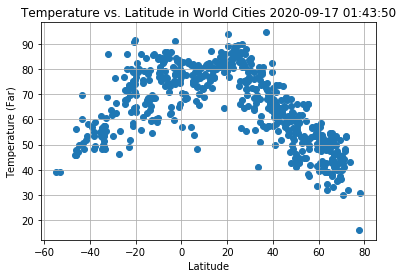

In [9]:
# Scatter Plots 
date = city_df.iloc[3,2]

plt.scatter(city_df["lat"], city_df["temp"], marker="o")

# Incorporate the other graph properties 
plt.title(f'Temperature vs. Latitude in World Cities' + " " + str(date) )
plt.ylabel("Temperature (Far)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1: Lat vs. Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

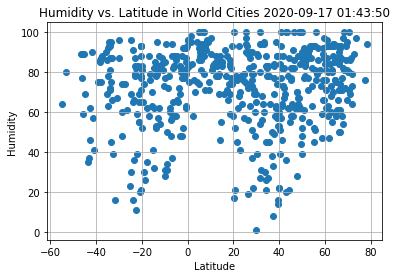

In [10]:
plt.scatter(city_df["lat"], city_df["hum"], marker="o")

# Humidity Plot 
plt.title("Humidity vs. Latitude in World Cities" + " " + str(date))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2: Lat vs. Hum.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

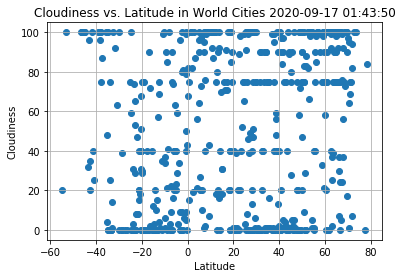

In [11]:
plt.scatter(city_df["lat"], city_df["clouds"], marker="o")

# Cloudiness Scatter Plot 
plt.title("Cloudiness vs. Latitude in World Cities" +  " " + str(date))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3: Lat vs. Clouds.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

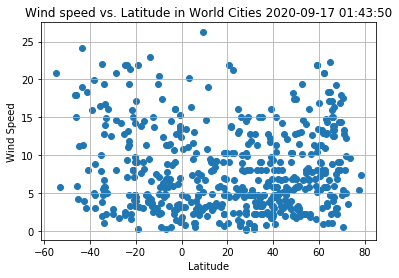

In [12]:
plt.scatter(city_df["lat"], city_df["wind"], marker="o")

# Wind speed scatter plot 
plt.title("Wind speed vs. Latitude in World Cities" +  " " + str(date))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4: Lat vs. Wind.png")

# Show plot
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression (x_axis, y_axis, title, xlabel, ylabel):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.tight_layout()
    plt.show()
    
    print(f"The r-squared is: {rvalue**2}")

    return 

In [14]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df.loc[city_df["lat"] >=0]
north_df

,city,country,date,lat,lon,temp,hum,clouds,wind
0,kodiak,US,2020-09-17 01:45:04,57.79,-152.41,53.60,81,90,11.41
2,guthrie,US,2020-09-17 01:43:09,35.88,-97.43,74.19,64,1,4.70
3,albany,US,2020-09-17 01:43:50,42.60,-73.97,59.18,69,4,4.00
4,tuktoyaktuk,CA,2020-09-17 01:45:05,69.45,-133.04,44.60,81,90,9.17
6,cagliliog,PH,2020-09-17 01:45:05,13.90,123.29,79.20,87,100,7.99
...,...,...,...,...,...,...,...,...,...
536,mumford,GH,2020-09-17 01:46:30,5.26,-0.76,74.71,90,27,13.13
537,omsukchan,RU,2020-09-17 01:46:30,62.53,155.80,41.13,68,99,7.99
539,eydhafushi,MV,2020-09-17 01:46:31,5.10,73.07,82.11,74,96,9.51
541,barcelos,PT,2020-09-17 01:46:31,41.54,-8.62,63.21,88,97,4.70


In [15]:
south_df = city_df.loc[city_df["lat"] <=0]
south_df

,city,country,date,lat,lon,temp,hum,clouds,wind
1,east london,ZA,2020-09-17 01:45:04,-33.02,27.91,60.58,66,14,14.97
5,puerto ayora,EC,2020-09-17 01:45:05,-0.74,-90.35,66.00,92,79,7.00
11,ushuaia,AR,2020-09-17 01:45:06,-54.80,-68.30,39.20,64,20,20.80
15,vaini,TO,2020-09-17 01:45:07,-21.20,-175.20,75.20,69,40,14.99
16,mataura,NZ,2020-09-17 01:45:07,-46.19,168.86,46.00,89,100,18.01
...,...,...,...,...,...,...,...,...,...
523,antsohihy,MG,2020-09-17 01:46:28,-14.88,47.99,62.47,82,3,3.94
525,mufumbwe,ZM,2020-09-17 01:46:29,-13.68,24.80,63.55,52,0,3.76
531,kieta,PG,2020-09-17 01:46:30,-6.22,155.63,86.76,65,74,7.81
538,sijunjung,ID,2020-09-17 01:46:31,-0.69,100.95,82.67,63,9,1.25


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

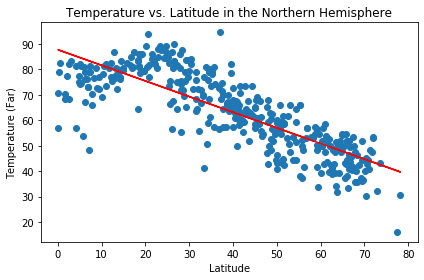

The r-squared is: 0.6587251944497873


In [16]:
regression(north_df["lat"], north_df["temp"],"Temperature vs. Latitude in the Northern Hemisphere","Latitude","Temperature (Far)")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

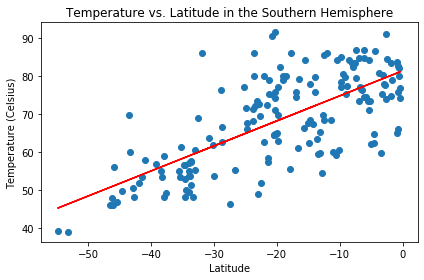

The r-squared is: 0.5125764994459321


<Figure size 432x288 with 0 Axes>

In [21]:
regression(south_df["lat"], south_df["temp"],"Temperature vs. Latitude in the Southern Hemisphere","Latitude","Temperature (Celsius)")
plt.savefig("tempsouth.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

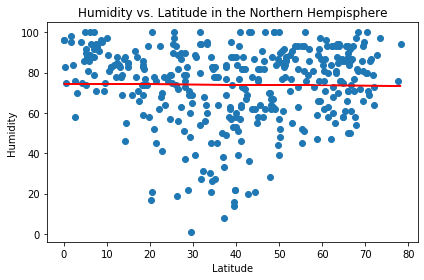

The r-squared is: 0.00019088427973995995


In [22]:
regression(north_df["lat"], north_df["hum"],"Humidity vs. Latitude in the Northern Hempisphere", "Latitude", "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

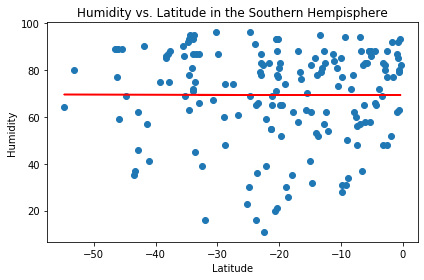

The r-squared is: 6.0812968695766085e-06


In [23]:
regression(south_df["lat"], south_df["hum"],"Humidity vs. Latitude in the Southern Hempisphere", "Latitude", "Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

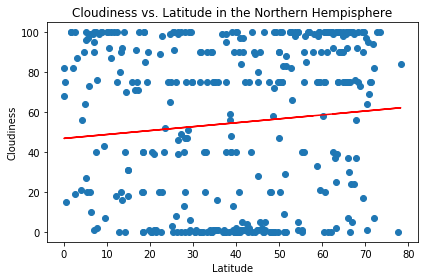

The r-squared is: 0.009815232719056795


In [24]:
regression(north_df["lat"], north_df["clouds"],"Cloudiness vs. Latitude in the Northern Hempisphere", "Latitude", "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

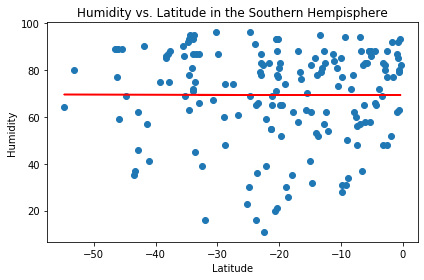

The r-squared is: 6.0812968695766085e-06


In [25]:
regression(south_df["lat"], south_df["hum"],"Humidity vs. Latitude in the Southern Hempisphere", "Latitude", "Humidity")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

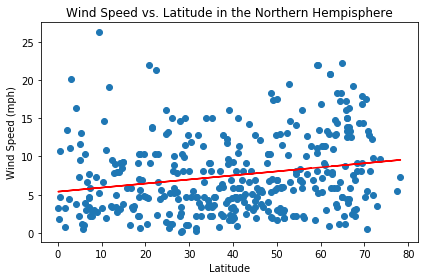

The r-squared is: 0.04472739353755058


In [26]:
regression(north_df["lat"], north_df["wind"],"Wind Speed vs. Latitude in the Northern Hempisphere", "Latitude", "Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

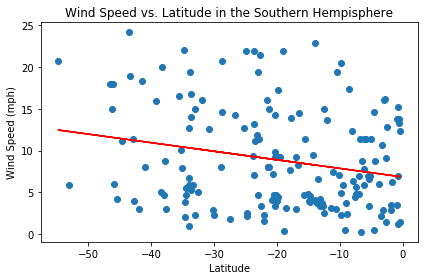

The r-squared is: 0.05330102658326989


In [27]:
regression(south_df["lat"], south_df["wind"],"Wind Speed vs. Latitude in the Southern Hempisphere", "Latitude", "Wind Speed (mph)")